Downloading the Dataset
#Precipitation and Temperature - Historical (1850-2014) and Future (SSP 585, 2015-2100)

In [2]:
!wget https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CCCma/CanESM5/historical/r20i1p1f1/day/pr/gn/v20190429/pr_day_CanESM5_historical_r20i1p1f1_gn_18500101-20141231.nc
#!wget https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r2i1p1f1/day/pr/gn/v20190429/pr_day_CanESM5_ssp585_r2i1p1f1_gn_20150101-21001231.nc
#!wget https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r6i1p2f1/day/tas/gn/v20190429/tas_day_CanESM5_ssp585_r6i1p2f1_gn_20150101-21001231.nc
#!wget https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CCCma/CanESM5/historical/r19i1p2f1/day/tas/gn/v20190429/tas_day_CanESM5_historical_r19i1p2f1_gn_18500101-20141231.nc

--2025-05-05 19:24:16--  https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CCCma/CanESM5/historical/r20i1p1f1/day/pr/gn/v20190429/pr_day_CanESM5_historical_r20i1p1f1_gn_18500101-20141231.nc
Resolving esgf-data1.llnl.gov (esgf-data1.llnl.gov)... 198.128.245.147
Connecting to esgf-data1.llnl.gov (esgf-data1.llnl.gov)|198.128.245.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1783197039 (1.7G) [application/x-netcdf]
Saving to: ‘pr_day_CanESM5_historical_r20i1p1f1_gn_18500101-20141231.nc’

pr_day_CanESM5_hist 100%[===================>]   1.66G  2.00MB/s    in 4m 59s  

2025-05-05 19:29:16 (5.69 MB/s) - ‘pr_day_CanESM5_historical_r20i1p1f1_gn_18500101-20141231.nc’ saved [1783197039/1783197039]



In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

# historical_pr_file = "/content/drive/My Drive/Tutorial_DOC/pr_day_CanESM5_historical_r20i1p1f1_gn_18500101-20141231.nc"

In [3]:
!pip install lmoments3
!pip install cftime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.9 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmoments3 as lm
from lmoments3 import distr
import warnings
import cftime
warnings.filterwarnings('ignore')

In [5]:
historical_pr_file = "pr_day_CanESM5_historical_r20i1p1f1_gn_18500101-20141231.nc"
future_pr_file = "pr_day_CanESM5_ssp585_r2i1p1f1_gn_20150101-21001231.nc"

location_1 = "Santiago"  # <-- CHANGE THIS TO YOUR CHOSEN LOCATION
location_2 = "Boston"
# ------------------------------
# LOCATION COORDINATES
# ------------------------------
location_coords = {
    "Boston": {"lat": 42.3601, "lon": -71.0589},
    "Santiago": {"lat": -33.4489, "lon": -70.6693},
    "Punta Arenas": {"lat": -53.1638, "lon": -70.9171},
    "Torres del Paine": {"lat": -51.0000, "lon": -73.0000},
    'New York': {"lat": 40.71, "lon": -74.00},
    "Córdoba": {"lat": -31.4201, "lon": -64.1888}
}


In [6]:
#Open_dataset_and_Visualize
ds_hist_pr = xr.open_dataset(historical_pr_file)
ds_fut_pr = xr.open_dataset(future_pr_file)

print(ds_fut_pr)

ds_hist_pr['time'] = xr.decode_cf(ds_hist_pr).time
ds_fut_pr['time'] = xr.decode_cf(ds_fut_pr).time



<xarray.Dataset> Size: 1GB
Dimensions:    (time: 31390, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 251kB 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 502kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    pr         (time, lat, lon) float32 1GB ...
Attributes: (12/53)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his02
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s8502
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/9f0

In [7]:
lat = ds_hist_pr.lat.values
lon = ds_hist_pr.lon.values


# Standardize longitudes if needed
if np.max(lon) > 180:
    print("Converting longitude coordinates to [-180, 180] range...")
    ds_hist_pr['lon'] = xr.where(ds_hist_pr['lon'] > 180, ds_hist_pr['lon'] - 360, ds_hist_pr['lon'])
    ds_fut_pr['lon'] = xr.where(ds_fut_pr['lon'] > 180, ds_fut_pr['lon'] - 360, ds_fut_pr['lon'])
    lon_pr = ds_hist_pr.lon.values


print(ds_hist_pr)



Converting longitude coordinates to [-180, 180] range...
<xarray.Dataset> Size: 2GB
Dimensions:    (time: 60225, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... -8.438 -5.625 -2.812
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 964kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    pr         (time, lat, lon) float32 2GB ...
Attributes: (12/53)
    CCCma_model_hash:            05c0a773433926e46ebc3af8139a0b5aa217871d
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his20
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                  

In [8]:
ds_hist_pr = ds_hist_pr.sortby('lon')
ds_fut_pr = ds_fut_pr.sortby('lon')


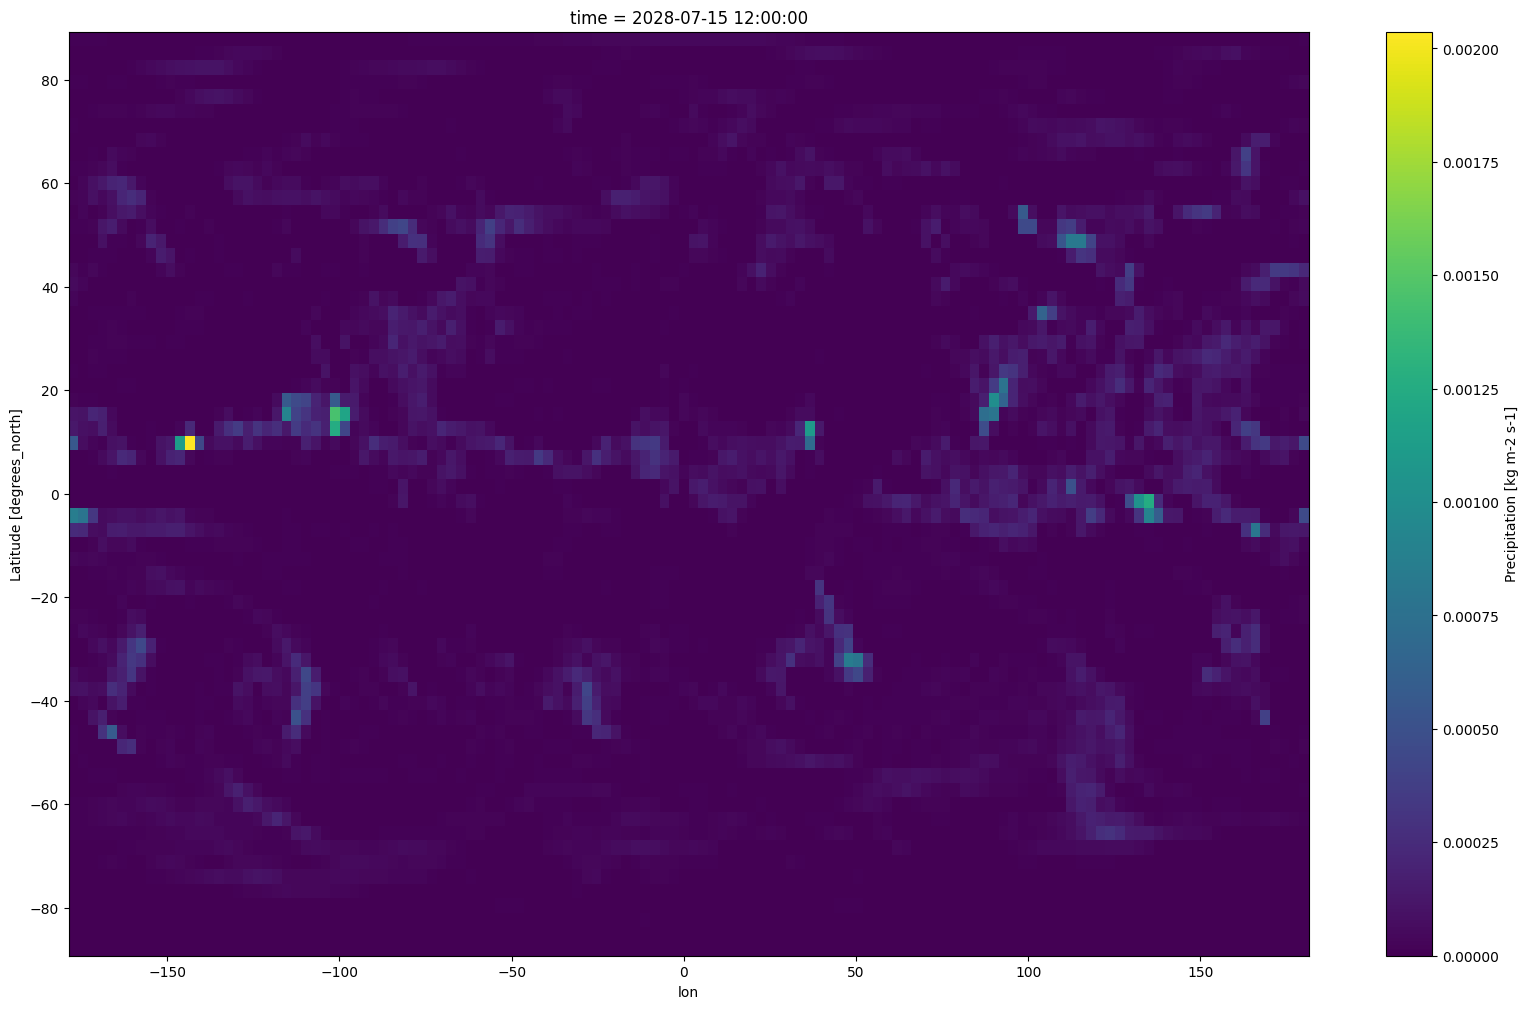

In [10]:
pr = ds_fut_pr.sel(time = '2028-07-15')
plt.figure(figsize= [20,12])
pr['pr'].plot()

In [11]:
ds_hist_pr['pr'] = ds_hist_pr['pr']*86400
ds_fut_pr['pr'] = ds_fut_pr['pr']*86400

In [12]:
def gev_wrapper(data,T):
    gevfit = gev_fit(data)
    RL = return_levels(gevfit,T)

    return  RL


def gev_fit(data):

    gevfit = distr.gev.lmom_fit(data)
    return gevfit


def return_levels(gevfit,T):

    #Return Level
    RL = distr.gev.ppf(1.0-1./T, **gevfit)

    return RL


In [13]:
#location 1

latitude = location_coords[location_1]["lat"]
longitude = location_coords[location_1]["lon"]

# Find nearest grid cell
lat = ds_hist_pr.lat.values
lon = ds_hist_pr.lon.values
latitude_grid = lat[np.argmin((lat - latitude)**2)]
longitude_grid = lon[np.argmin((lon - longitude)**2)]

# Select data at grid point
dsloc_hist = ds_hist_pr.sel(lat=latitude_grid, lon=longitude_grid, method='nearest')
dsloc_fut = ds_fut_pr.sel(lat=latitude_grid, lon=longitude_grid, method='nearest')

# Extract precipitation data
pr_hist = dsloc_hist['pr']
pr_fut = dsloc_fut['pr']

# Decode time if needed
if not np.issubdtype(pr_hist.time.dtype, np.datetime64):
    pr_hist['time'] = xr.decode_cf(pr_hist.to_dataset()).time
    pr_fut['time'] = xr.decode_cf(pr_fut.to_dataset()).time

# Calculate annual max
annual_max_hist_Loc1 = pr_hist.resample(time='1Y').max()
annual_max_fut_Loc1 = pr_fut.resample(time='1Y').max()


Text(0, 0.5, 'Precipitation (mm/day)')

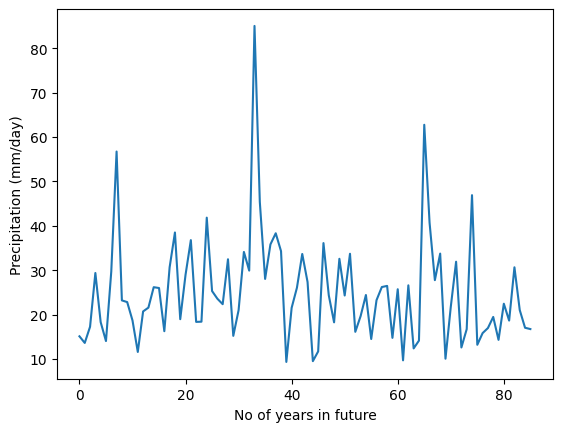

In [17]:
plt.plot(annual_max_fut_Loc1)
plt.xlabel('No of years in future')
plt.ylabel('Precipitation (mm/day)')


In [18]:
#location2

latitude = location_coords[location_2]["lat"]
longitude = location_coords[location_2]["lon"]

# Find nearest grid cell
lat = ds_hist_pr.lat.values
lon = ds_hist_pr.lon.values
latitude_grid = lat[np.argmin((lat - latitude)**2)]
longitude_grid = lon[np.argmin((lon - longitude)**2)]

# Select data at grid point
dsloc_hist = ds_hist_pr.sel(lat=latitude_grid, lon=longitude_grid, method='nearest')
dsloc_fut = ds_fut_pr.sel(lat=latitude_grid, lon=longitude_grid, method='nearest')

# Extract precipitation data
pr_hist = dsloc_hist['pr']
pr_fut = dsloc_fut['pr']

# Decode time if needed
if not np.issubdtype(pr_hist.time.dtype, np.datetime64):
    pr_hist['time'] = xr.decode_cf(pr_hist.to_dataset()).time
    pr_fut['time'] = xr.decode_cf(pr_fut.to_dataset()).time

# Calculate annual max
annual_max_hist_Loc2 = pr_hist.resample(time='1Y').max()
annual_max_fut_Loc2 = pr_fut.resample(time='1Y').max()


In [19]:
T_100  = np.arange(0.1, 99.1, 0.1) + 1
Location_1_RL_hist=  gev_wrapper(annual_max_hist_Loc1,T_100)
Location_1_RL_fut=  gev_wrapper(annual_max_fut_Loc1,T_100)
Location_2_R_hist=  gev_wrapper(annual_max_hist_Loc2,T_100)
Location_2_R_fut=  gev_wrapper(annual_max_fut_Loc2,T_100)


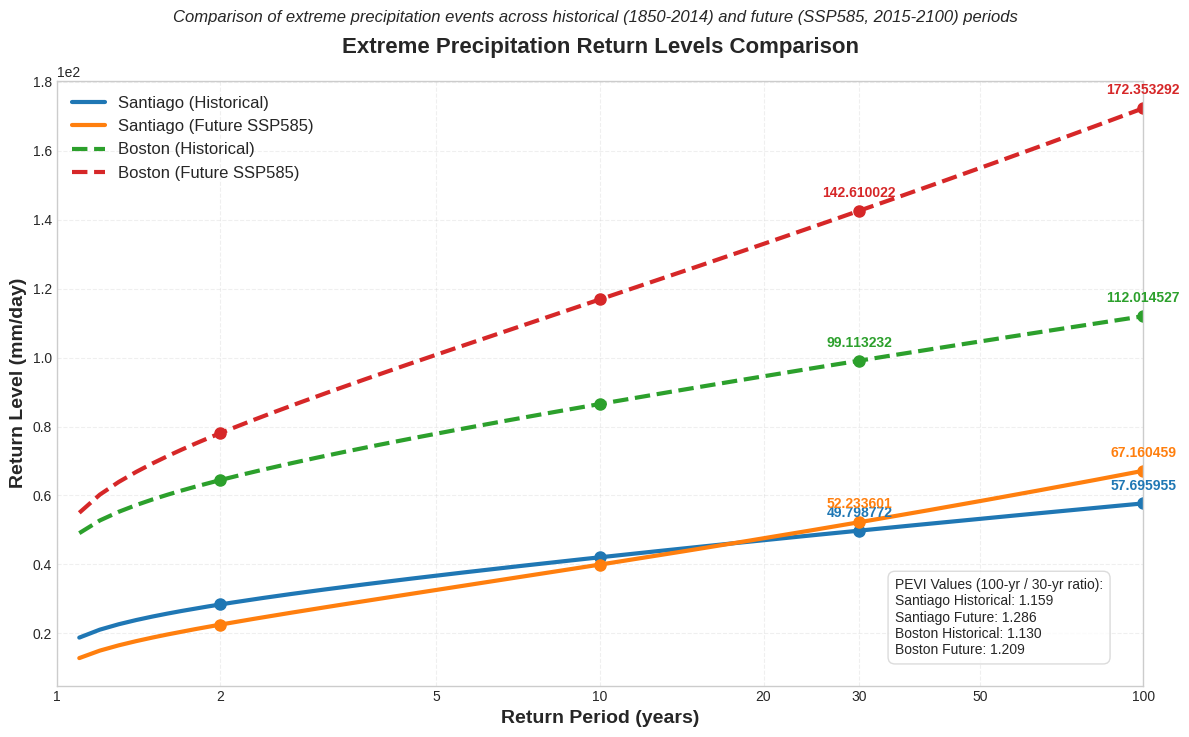

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Define return periods
T_100 = np.arange(0.1, 99.1, 0.1) + 1

# Create figure with better aesthetics
plt.figure(figsize=[12, 8])

# Set styling parameters
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
linestyles = ['-', '-', '--', '--']
linewidths = [3, 3, 3, 3]

# Plot return level curves
plt.plot(T_100, Location_1_RL_hist, color=colors[0], linestyle=linestyles[0],
         linewidth=linewidths[0], label=f'{location_1} (Historical)')
plt.plot(T_100, Location_1_RL_fut, color=colors[1], linestyle=linestyles[1],
         linewidth=linewidths[1], label=f'{location_1} (Future SSP585)')
plt.plot(T_100, Location_2_R_hist, color=colors[2], linestyle=linestyles[2],
         linewidth=linewidths[2], label=f'{location_2} (Historical)')
plt.plot(T_100, Location_2_R_fut, color=colors[3], linestyle=linestyles[3],
         linewidth=linewidths[3], label=f'{location_2} (Future SSP585)')

# Enhance grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add labels and title
plt.xlabel('Return Period (years)', fontsize=14, fontweight='bold')
plt.ylabel('Return Level (mm/day)', fontsize=14, fontweight='bold')
plt.title('Extreme Precipitation Return Levels Comparison', fontsize=16, fontweight='bold', pad=20)

# Format x-axis as logarithmic scale with custom ticks for better readability
plt.xscale('log')
plt.xlim([1, 100])
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().set_xticks([1, 2, 5, 10, 20, 30, 50, 100])

# Define function to find the closest value in an array
def find_nearest_idx(array, value):
    return (np.abs(array - value)).argmin()

# Add annotations for key return periods
key_periods = [2, 10, 30, 100]
for period in key_periods:
    # Find the closest index for each period
    idx = find_nearest_idx(T_100, period)

    # Get the values at those indices
    val1_hist = Location_1_RL_hist[idx]
    val1_fut = Location_1_RL_fut[idx]
    val2_hist = Location_2_R_hist[idx]
    val2_fut = Location_2_R_fut[idx]

    # Add markers for these key points
    plt.plot(period, val1_hist, 'o', color=colors[0], markersize=8)
    plt.plot(period, val1_fut, 'o', color=colors[1], markersize=8)
    plt.plot(period, val2_hist, 'o', color=colors[2], markersize=8)
    plt.plot(period, val2_fut, 'o', color=colors[3], markersize=8)

    # Add value labels for 30-year and 100-year events
    if period in [30, 100]:
        plt.annotate(f"{val1_hist:.6f}",
                     (period, val1_hist),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[0])

        plt.annotate(f"{val1_fut:.6f}",
                     (period, val1_fut),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[1])

        plt.annotate(f"{val2_hist:.6f}",
                     (period, val2_hist),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[2])

        plt.annotate(f"{val2_fut:.6f}",
                     (period, val2_fut),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[3])

# Find indices for 30-year and 100-year events for PEVI calculation
idx_30 = find_nearest_idx(T_100, 30)
idx_100 = find_nearest_idx(T_100, 100)

# Compute PEVI (Precipitation Extremes Variability Index)
PEVI_1_hist = Location_1_RL_hist[idx_100] / Location_1_RL_hist[idx_30]
PEVI_1_fut = Location_1_RL_fut[idx_100] / Location_1_RL_fut[idx_30]
PEVI_2_hist = Location_2_R_hist[idx_100] / Location_2_R_hist[idx_30]
PEVI_2_fut = Location_2_R_fut[idx_100] / Location_2_R_fut[idx_30]

# Add PEVI info as text box
textstr = '\n'.join((
    f'PEVI Values (100-yr / 30-yr ratio):',
    f'{location_1} Historical: {PEVI_1_hist:.3f}',
    f'{location_1} Future: {PEVI_1_fut:.3f}',
    f'{location_2} Historical: {PEVI_2_hist:.3f}',
    f'{location_2} Future: {PEVI_2_fut:.3f}'))

# Position text box in the upper right corner
plt.figtext(0.75, 0.15, textstr, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray', boxstyle='round,pad=0.5'))

# Enhance legend
plt.legend(loc='upper left', fontsize=12, framealpha=0.9,
           edgecolor='lightgray', fancybox=True)

# Add secondary title explaining the plot
plt.figtext(0.5, 0.94,
            "Comparison of extreme precipitation events across historical (1850-2014) and future (SSP585, 2015-2100) periods",
            ha="center", fontsize=12, style='italic')



# Format y-axis using scientific notation for better readability
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Tight layout
plt.tight_layout(rect=[0, 0.04, 1, 0.94])  # Adjust to make room for subtitles

# Show plot
plt.show()

In [21]:
historical_tas_file = "tas_day_CanESM5_historical_r19i1p2f1_gn_18500101-20141231.nc"
future_tas_file = "tas_day_CanESM5_ssp585_r6i1p2f1_gn_20150101-21001231.nc"
ds_hist_tas = xr.open_dataset(historical_tas_file)
ds_fut_tas = xr.open_dataset(future_tas_file)

ds_hist_pr['time'] = xr.decode_cf(ds_hist_pr).time
ds_fut_pr['time'] = xr.decode_cf(ds_fut_pr).time


lat_tas = ds_hist_tas.lat.values
lon_tas = ds_hist_tas.lon.values

if np.max(lon_tas) > 180:
    ds_hist_tas['lon'] = xr.where(ds_hist_tas['lon'] > 180, ds_hist_tas['lon'] - 360, ds_hist_tas['lon'])
    ds_fut_tas['lon'] = xr.where(ds_fut_tas['lon'] > 180, ds_fut_tas['lon'] - 360, ds_fut_tas['lon'])
    lon_tas = ds_hist_tas.lon.values
ds_hist_tas['tas'] = ds_hist_tas['tas'] - 273.15
ds_fut_tas['tas'] = ds_fut_tas['tas'] - 273.15

ds_hist_tas = ds_hist_tas.sortby('lon')
ds_fut_tas = ds_fut_tas.sortby('lon')

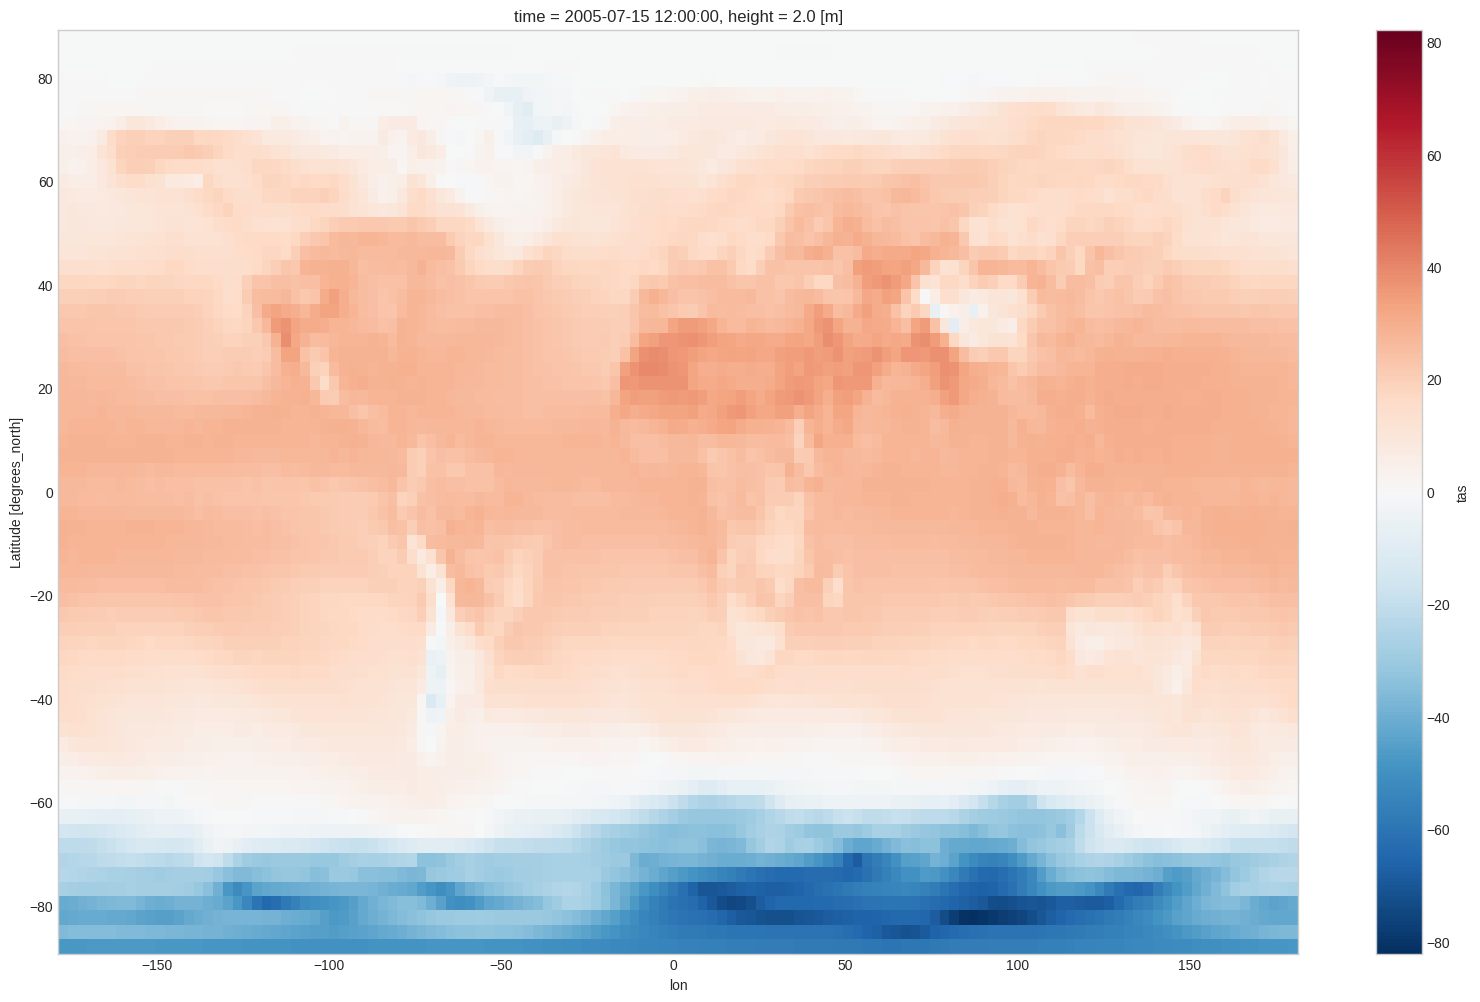

In [22]:
tas = ds_hist_tas.sel(time = '2005-07-15')
plt.figure(figsize= [20,12])
tas['tas'].plot()

In [23]:
location_1='Santiago'
location_2= 'Córdoba'
lat1 = location_coords[location_1]["lat"]
lon1 = location_coords[location_1]["lon"]
lat2 = location_coords[location_2]["lat"]
lon2 = location_coords[location_2]["lon"]

# Find nearest grid point
lat_idx2 = np.argmin(np.abs(lat - lat2))
lon_idx2 = np.argmin(np.abs(lon - lon2))
lat_grid2 = lat[lat_idx2]
lon_grid2 = lon[lon_idx2]
# Get lat/lon values
lat = ds_hist_pr.lat.values
lon = ds_hist_pr.lon.values

# Find nearest grid point
lat_idx1 = np.argmin(np.abs(lat - lat1))
lon_idx1 = np.argmin(np.abs(lon - lon1))
lat_grid1 = lat[lat_idx1]
lon_grid1 = lon[lon_idx1]


tas_hist_loc1 = ds_hist_tas.sel(lat=lat_grid1, lon=lon_grid1, method='nearest')['tas']
tas_fut_loc1 = ds_fut_tas.sel(lat=lat_grid1, lon=lon_grid1, method='nearest')['tas']

tas_hist_loc2 = ds_hist_tas.sel(lat=lat_grid2, lon=lon_grid2, method='nearest')['tas']
tas_fut_loc2 = ds_fut_tas.sel(lat=lat_grid2, lon=lon_grid2, method='nearest')['tas']




Warm Spell Duration Index (WSDI)

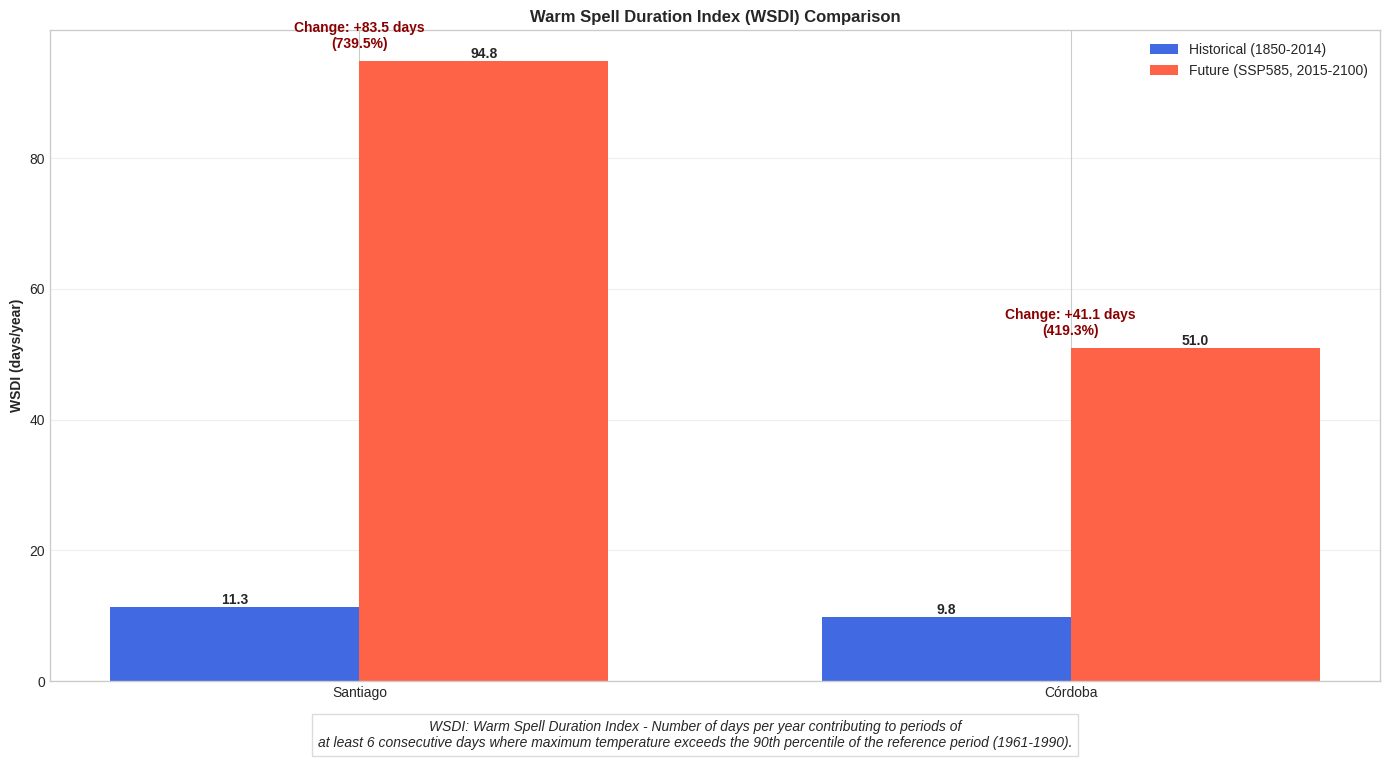


==== Summary of Warm Spell Duration Index (WSDI) Analysis ====

Warm Spell Duration Index (WSDI):
Location 1: Historical = 11.29 days/year, Future = 94.79 days/year
    Absolute Change: +83.50 days/year
    Percent Change: +739.53%

Location 2: Historical = 9.81 days/year, Future = 50.95 days/year
    Absolute Change: +41.14 days/year
    Percent Change: +419.29%

Threshold Temperature (90th percentile):
Location 1: 19.42°C
Location 2: 25.82°C


In [25]:


def calculate_wsdi(daily_temp, baseline_temp, baseline_start_year, baseline_end_year, min_consecutive_days=6):
    """
    Calculate Warm Spell Duration Index (WSDI)

    Parameters:
    -----------
    daily_temp : xarray.DataArray
        Daily temperature data
    baseline_temp : xarray.DataArray
        Temperature data for baseline period
    baseline_start_year : int
        Start year of baseline period
    baseline_end_year : int
        End year of baseline period
    min_consecutive_days : int
        Minimum number of consecutive days to be considered a warm spell (default: 6)

    Returns:
    --------
    wsdi_by_year : list of tuples
        (year, wsdi_value) pairs
    threshold : float
        90th percentile threshold used
    """
    # Extract baseline period
    baseline_data = baseline_temp.sel(time=slice(f"{baseline_start_year}", f"{baseline_end_year}"))

    # Calculate 90th percentile threshold from baseline
    threshold = np.percentile(baseline_data.values, 90)

    # Get unique years directly from the time values
    # This works with cftime objects
    years = np.unique([t.year for t in daily_temp.time.values])

    wsdi_by_year = []

    for year in years:
        # Filter data for this year
        year_data = daily_temp.sel(time=[t.year == year for t in daily_temp.time.values])

        # Find days exceeding threshold
        exceed_threshold = year_data.values > threshold

        # Calculate warm spells (sequences of at least min_consecutive_days)
        wsdi_days = 0
        consecutive_days = 0

        for day_exceed in exceed_threshold:
            if day_exceed:
                consecutive_days += 1
            else:
                # If we had a warm spell, add its length to total
                if consecutive_days >= min_consecutive_days:
                    wsdi_days += consecutive_days
                consecutive_days = 0

        # Check if the year ends during a warm spell
        if consecutive_days >= min_consecutive_days:
            wsdi_days += consecutive_days

        wsdi_by_year.append((year, wsdi_days))

    return wsdi_by_year, threshold

# Define baseline period (commonly 1961-1990)
baseline_start_year = 1961
baseline_end_year = 1990

# Calculate WSDI for Location 1
wsdi_hist_loc1, threshold_loc1 = calculate_wsdi(
    tas_hist_loc1,
    tas_hist_loc1,
    baseline_start_year,
    baseline_end_year
)

wsdi_fut_loc1, _ = calculate_wsdi(
    tas_fut_loc1,
    tas_hist_loc1,
    baseline_start_year,
    baseline_end_year
)

# Calculate WSDI for Location 2
wsdi_hist_loc2, threshold_loc2 = calculate_wsdi(
    tas_hist_loc2,
    tas_hist_loc2,
    baseline_start_year,
    baseline_end_year
)

wsdi_fut_loc2, _ = calculate_wsdi(
    tas_fut_loc2,
    tas_hist_loc2,
    baseline_start_year,
    baseline_end_year
)

# Calculate averages
wsdi_avg_hist_loc1 = np.mean([value for _, value in wsdi_hist_loc1])
wsdi_avg_fut_loc1 = np.mean([value for _, value in wsdi_fut_loc1])
wsdi_avg_hist_loc2 = np.mean([value for _, value in wsdi_hist_loc2])
wsdi_avg_fut_loc2 = np.mean([value for _, value in wsdi_fut_loc2])

# Create visualization
plt.figure(figsize=(14, 8))

# Set up data for plotting
locations = ['Santiago', 'Córdoba']  # Replace with actual location names if available
x = np.arange(len(locations))
width = 0.35

historical_values = [wsdi_avg_hist_loc1, wsdi_avg_hist_loc2]
future_values = [wsdi_avg_fut_loc1, wsdi_avg_fut_loc2]

# Create bar chart
plt.bar(x - width/2, historical_values, width, label='Historical (1850-2014)', color='royalblue')
plt.bar(x + width/2, future_values, width, label='Future (SSP585, 2015-2100)', color='tomato')

plt.ylabel('WSDI (days/year)', fontweight='bold')
plt.title('Warm Spell Duration Index (WSDI) Comparison', fontweight='bold')
plt.xticks(x, locations)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Add value labels on bars
for i, v in enumerate(historical_values):
    plt.text(i - width/2, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold')
for i, v in enumerate(future_values):
    plt.text(i + width/2, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold')

# Add absolute and percent change
for i in range(len(locations)):
    abs_change = future_values[i] - historical_values[i]
    percent_change = ((future_values[i] - historical_values[i]) / historical_values[i]) * 100

    plt.text(i, max(historical_values[i], future_values[i]) + 2,
             f'Change: +{abs_change:.1f} days\n({percent_change:.1f}%)',
             ha='center', fontweight='bold',
             color='darkred')

# Add explanation text
plt.figtext(0.5, 0.01,
           "WSDI: Warm Spell Duration Index - Number of days per year contributing to periods of\nat least 6 consecutive days where maximum temperature exceeds the 90th percentile of the reference period (1961-1990).",
           ha='center', fontsize=10, style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('wsdi_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary of findings
print("\n==== Summary of Warm Spell Duration Index (WSDI) Analysis ====")
print(f"\nWarm Spell Duration Index (WSDI):")
print(f"Location 1: Historical = {wsdi_avg_hist_loc1:.2f} days/year, Future = {wsdi_avg_fut_loc1:.2f} days/year")
print(f"    Absolute Change: +{(wsdi_avg_fut_loc1-wsdi_avg_hist_loc1):.2f} days/year")
print(f"    Percent Change: +{((wsdi_avg_fut_loc1-wsdi_avg_hist_loc1)/wsdi_avg_hist_loc1*100):.2f}%")
print(f"\nLocation 2: Historical = {wsdi_avg_hist_loc2:.2f} days/year, Future = {wsdi_avg_fut_loc2:.2f} days/year")
print(f"    Absolute Change: +{(wsdi_avg_fut_loc2-wsdi_avg_hist_loc2):.2f} days/year")
print(f"    Percent Change: +{((wsdi_avg_fut_loc2-wsdi_avg_hist_loc2)/wsdi_avg_hist_loc2*100):.2f}%")
print(f"\nThreshold Temperature (90th percentile):")
print(f"Location 1: {threshold_loc1:.2f}°C")
print(f"Location 2: {threshold_loc2:.2f}°C")

First selecting only the temperature data from the defined baseline period (1961-1990)
Using NumPy's percentile function to calculate the 90th percentile of all daily temperature values in this baseline period

In climate studies, this approach is used to define what counts as "extreme" or "unusual" relative to a historical reference period. By using the 90th percentile, we're saying that a temperature is considered unusually warm if it exceeds the value that was only exceeded 10% of the time during the baseline period.
The WSDI then looks for sequences of at least 6 consecutive days where this threshold is exceeded, which is what defines a "warm spell" in this metric. This approach ensures that the definition of a "warm spell" is relative to the local climate of each location, making it possible to compare locations with different baseline temperatures.

Night Time Maxima


Processing night time temperature maxima for Santiago...
Nearest grid point for Santiago: (-32.091943881744044, -70.3125)

Processing night time temperature maxima for Córdoba...
Nearest grid point for Córdoba: (-32.091943881744044, -64.6875)


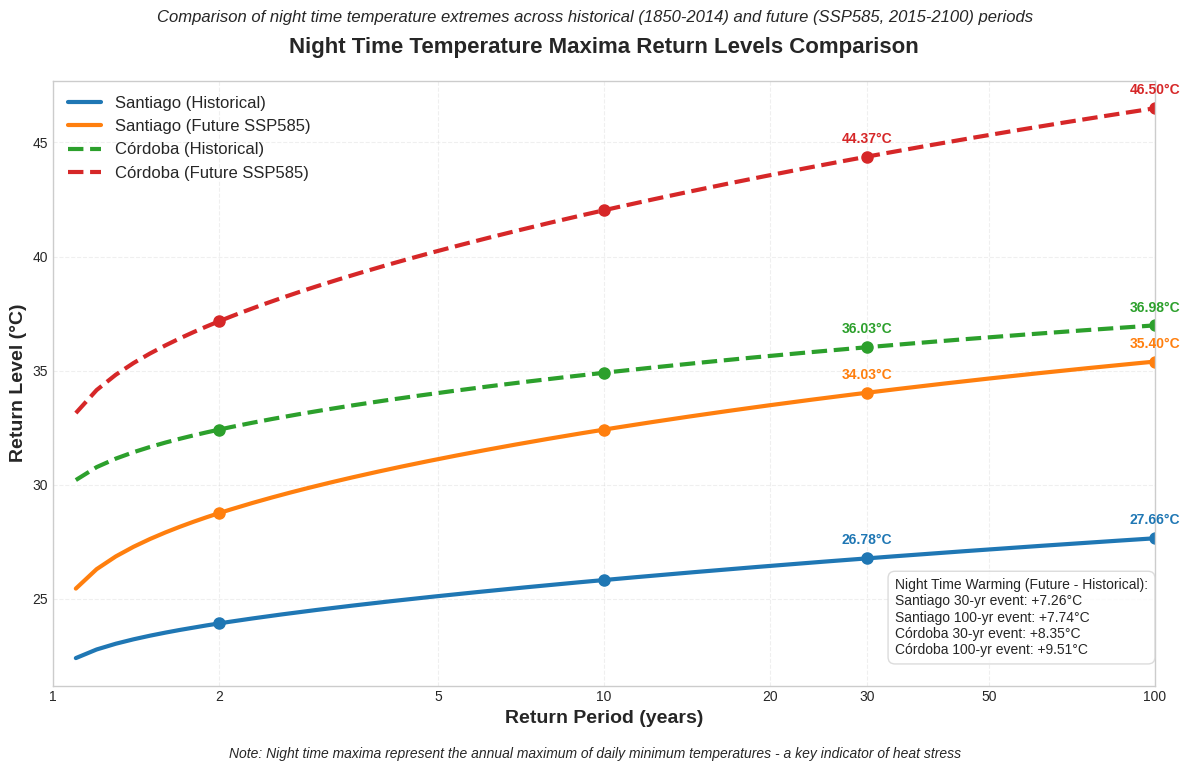


==== Key Findings: Night Time Temperature Extremes ====

Santiago:
- Historical 30-year night time maxima: 26.78°C
- Future 30-year night time maxima: 34.03°C (Change: +7.26°C)
- Historical 100-year night time maxima: 27.66°C
- Future 100-year night time maxima: 35.40°C (Change: +7.74°C)

Córdoba:
- Historical 30-year night time maxima: 36.03°C
- Future 30-year night time maxima: 44.37°C (Change: +8.35°C)
- Historical 100-year night time maxima: 36.98°C
- Future 100-year night time maxima: 46.50°C (Change: +9.51°C)


In [26]:


# Function to extract and process temperature data for a location
def process_temperature_location(location_name):
    # Get coordinates for the location
    latitude = location_coords[location_name]["lat"]
    longitude = location_coords[location_name]["lon"]

    # Find nearest grid point
    lat_grid = lat_tas[np.argmin((lat_tas - latitude)**2)]
    lon_grid = lon_tas[np.argmin((lon_tas - longitude)**2)]

    print(f"Nearest grid point for {location_name}: ({lat_grid}, {lon_grid})")

    # Extract data at grid point
    dsloc_hist = ds_hist_tas.sel(lat=lat_grid, lon=lon_grid, method='nearest')
    dsloc_fut = ds_fut_tas.sel(lat=lat_grid, lon=lon_grid, method='nearest')

    # Extract temperature data
    tas_hist = dsloc_hist['tas']
    tas_fut = dsloc_fut['tas']

    # Decode time if needed
    if not np.issubdtype(tas_hist.time.dtype, np.datetime64):
        tas_hist['time'] = xr.decode_cf(tas_hist.to_dataset()).time
        tas_fut['time'] = xr.decode_cf(tas_fut.to_dataset()).time

    # For night time maxima, we need to:
    # 1. Calculate daily minimum temperatures (night time)
    # 2. Then find the annual maximum of these daily minimums

    # Group by day to find daily minimums
    # Resample to daily frequency and take minimum
    daily_min_hist = tas_hist.resample(time='1D').min()
    daily_min_fut = tas_fut.resample(time='1D').min()

    # Find annual maximum of daily minimums (night time maxima)
    night_max_hist = daily_min_hist.resample(time='1Y').max()
    night_max_fut = daily_min_fut.resample(time='1Y').max()

    return night_max_hist, night_max_fut

# Process temperature data for both locations
print(f"\nProcessing night time temperature maxima for {location_1}...")
night_max_hist_Loc1, night_max_fut_Loc1 = process_temperature_location(location_1)

print(f"\nProcessing night time temperature maxima for {location_2}...")
night_max_hist_Loc2, night_max_fut_Loc2 = process_temperature_location(location_2)

# Apply GEV analysis to the night time maxima
T_100 = np.arange(0.1, 99.1, 0.1) + 1
Night_Loc1_RL_hist = gev_wrapper(night_max_hist_Loc1, T_100)
Night_Loc1_RL_fut = gev_wrapper(night_max_fut_Loc1, T_100)
Night_Loc2_RL_hist = gev_wrapper(night_max_hist_Loc2, T_100)
Night_Loc2_RL_fut = gev_wrapper(night_max_fut_Loc2, T_100)

# Create visualization for night time temperature maxima
plt.figure(figsize=[12, 8])

# Set styling parameters
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
linestyles = ['-', '-', '--', '--']
linewidths = [3, 3, 3, 3]

# Plot return level curves
plt.plot(T_100, Night_Loc1_RL_hist, color=colors[0], linestyle=linestyles[0],
         linewidth=linewidths[0], label=f'{location_1} (Historical)')
plt.plot(T_100, Night_Loc1_RL_fut, color=colors[1], linestyle=linestyles[1],
         linewidth=linewidths[1], label=f'{location_1} (Future SSP585)')
plt.plot(T_100, Night_Loc2_RL_hist, color=colors[2], linestyle=linestyles[2],
         linewidth=linewidths[2], label=f'{location_2} (Historical)')
plt.plot(T_100, Night_Loc2_RL_fut, color=colors[3], linestyle=linestyles[3],
         linewidth=linewidths[3], label=f'{location_2} (Future SSP585)')

# Enhance grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add labels and title
plt.xlabel('Return Period (years)', fontsize=14, fontweight='bold')
plt.ylabel('Return Level (°C)', fontsize=14, fontweight='bold')
plt.title('Night Time Temperature Maxima Return Levels Comparison', fontsize=16, fontweight='bold', pad=20)

# Format x-axis as logarithmic scale with custom ticks for better readability
plt.xscale('log')
plt.xlim([1, 100])
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().set_xticks([1, 2, 5, 10, 20, 30, 50, 100])

# Define function to find the closest value in an array (using the one you already defined)
def find_nearest_idx(array, value):
    return (np.abs(array - value)).argmin()

# Add annotations for key return periods
key_periods = [2, 10, 30, 100]
for period in key_periods:
    # Find the closest index for each period
    idx = find_nearest_idx(T_100, period)

    # Get the values at those indices
    val1_hist = Night_Loc1_RL_hist[idx]
    val1_fut = Night_Loc1_RL_fut[idx]
    val2_hist = Night_Loc2_RL_hist[idx]
    val2_fut = Night_Loc2_RL_fut[idx]

    # Add markers for these key points
    plt.plot(period, val1_hist, 'o', color=colors[0], markersize=8)
    plt.plot(period, val1_fut, 'o', color=colors[1], markersize=8)
    plt.plot(period, val2_hist, 'o', color=colors[2], markersize=8)
    plt.plot(period, val2_fut, 'o', color=colors[3], markersize=8)

    # Add value labels for 30-year and 100-year events
    if period in [30, 100]:
        plt.annotate(f"{val1_hist:.2f}°C",
                     (period, val1_hist),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[0])

        plt.annotate(f"{val1_fut:.2f}°C",
                     (period, val1_fut),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[1])

        plt.annotate(f"{val2_hist:.2f}°C",
                     (period, val2_hist),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[2])

        plt.annotate(f"{val2_fut:.2f}°C",
                     (period, val2_fut),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontweight='bold',
                     color=colors[3])

# Find indices for 30-year and 100-year events for warming calculation
idx_30 = find_nearest_idx(T_100, 30)
idx_100 = find_nearest_idx(T_100, 100)

# Calculate warming ratios and differences
warming_1_30yr = Night_Loc1_RL_fut[idx_30] - Night_Loc1_RL_hist[idx_30]
warming_1_100yr = Night_Loc1_RL_fut[idx_100] - Night_Loc1_RL_hist[idx_100]
warming_2_30yr = Night_Loc2_RL_fut[idx_30] - Night_Loc2_RL_hist[idx_30]
warming_2_100yr = Night_Loc2_RL_fut[idx_100] - Night_Loc2_RL_hist[idx_100]

# Add warming info as text box
textstr = '\n'.join((
    f'Night Time Warming (Future - Historical):',
    f'{location_1} 30-yr event: +{warming_1_30yr:.2f}°C',
    f'{location_1} 100-yr event: +{warming_1_100yr:.2f}°C',
    f'{location_2} 30-yr event: +{warming_2_30yr:.2f}°C',
    f'{location_2} 100-yr event: +{warming_2_100yr:.2f}°C'))

# Position text box in the upper right corner
plt.figtext(0.75, 0.15, textstr, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray', boxstyle='round,pad=0.5'))

# Enhance legend
plt.legend(loc='upper left', fontsize=12, framealpha=0.9,
           edgecolor='lightgray', fancybox=True)

# Add secondary title explaining the plot
plt.figtext(0.5, 0.94,
            "Comparison of night time temperature extremes across historical (1850-2014) and future (SSP585, 2015-2100) periods",
            ha="center", fontsize=12, style='italic')

# Add note explaining night time maxima
plt.figtext(0.5, 0.02,
            "Note: Night time maxima represent the annual maximum of daily minimum temperatures - a key indicator of heat stress",
            ha="center", fontsize=10, style='italic')

# Tight layout
plt.tight_layout(rect=[0, 0.04, 1, 0.94])  # Adjust to make room for subtitles

# Show plot
plt.show()

# Print key findings
print("\n==== Key Findings: Night Time Temperature Extremes ====")
print(f"\n{location_1}:")
print(f"- Historical 30-year night time maxima: {Night_Loc1_RL_hist[idx_30]:.2f}°C")
print(f"- Future 30-year night time maxima: {Night_Loc1_RL_fut[idx_30]:.2f}°C (Change: +{warming_1_30yr:.2f}°C)")
print(f"- Historical 100-year night time maxima: {Night_Loc1_RL_hist[idx_100]:.2f}°C")
print(f"- Future 100-year night time maxima: {Night_Loc1_RL_fut[idx_100]:.2f}°C (Change: +{warming_1_100yr:.2f}°C)")

print(f"\n{location_2}:")
print(f"- Historical 30-year night time maxima: {Night_Loc2_RL_hist[idx_30]:.2f}°C")
print(f"- Future 30-year night time maxima: {Night_Loc2_RL_fut[idx_30]:.2f}°C (Change: +{warming_2_30yr:.2f}°C)")
print(f"- Historical 100-year night time maxima: {Night_Loc2_RL_hist[idx_100]:.2f}°C")
print(f"- Future 100-year night time maxima: {Night_Loc2_RL_fut[idx_100]:.2f}°C (Change: +{warming_2_100yr:.2f}°C)")

# Compare night warming vs day warming
if 'tas_hist_annual_max_Loc1' in locals():
    # If you've already calculated day time maxima
    day_warming_1 = tas_fut_annual_max_Loc1 - tas_hist_annual_max_Loc1
    day_warming_2 = tas_fut_annual_max_Loc2 - tas_hist_annual_max_Loc2

    print("\n==== Night vs Day Warming Comparison ====")
    print(f"{location_1} night time warming: +{warming_1_100yr:.2f}°C")
    print(f"{location_1} day time warming: +{day_warming_1:.2f}°C")
    print(f"{location_2} night time warming: +{warming_2_100yr:.2f}°C")
    print(f"{location_2} day time warming: +{day_warming_2:.2f}°C")